In [1]:
# Obsolete version of duplicate_check_examples.ipynb

import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import blimpy as bl
from scipy.stats import skew, kurtosis
from scipy import stats
from scipy.interpolate import interp1d
from astropy.stats import sigma_clip
import setigen as stg
from astropy import units as u
import h5py
%matplotlib inline

In [2]:
csv_file = '/home/cgchoza/galaxies/complete_cadences_catalog.csv'

df = pd.read_csv(csv_file)

dfl = df.iloc[np.where(df['Band'].values == 'L')[0]]

In [3]:
dfl

,Target,Session,Band,Cadence ID,Frequency,.h5 path,.dat path,Time
0,DDO210,AGBT18A_999_103,L,24777,2251,/datag/pipeline/AGBT18A_999_103/collate/splice...,/home/obs/turboseti/AGBT18A_999_103/collate/sp...,2018-07-07 08:49:26
1,DDO210,AGBT18A_999_103,L,24777,2251,/datag/pipeline/AGBT18A_999_103/collate/splice...,/home/obs/turboseti/AGBT18A_999_103/collate/sp...,2018-07-07 08:49:26
2,DDO210,AGBT18A_999_103,L,24777,2251,/datag/pipeline/AGBT18A_999_103/collate/splice...,/home/obs/turboseti/AGBT18A_999_103/collate/sp...,2018-07-07 08:49:26
3,DDO210,AGBT18A_999_103,L,24777,2251,/datag/pipeline/AGBT18A_999_103/collate/splice...,/home/obs/turboseti/AGBT18A_999_103/collate/sp...,2018-07-07 08:49:26
4,DDO210,AGBT18A_999_103,L,24777,2251,/datag/pipeline/AGBT18A_999_103/collate/splice...,/home/obs/turboseti/AGBT18A_999_103/collate/sp...,2018-07-07 08:49:26
...,...,...,...,...,...,...,...,...
36553,NGC3226,AGBT22B_999_25,L,411390,1126,/datag/pipeline/AGBT22B_999_25/blc16_blp06/blc...,/home/obs/turboseti/AGBT22B_999_25/blc16_blp06...,2022-11-19 06:13:36
36554,NGC3226,AGBT22B_999_25,L,411390,1126,/datag/pipeline/AGBT22B_999_25/blc16_blp06/blc...,/home/obs/turboseti/AGBT22B_999_25/blc16_blp06...,2022-11-19 06:13:36
36555,NGC3226,AGBT22B_999_25,L,411390,1126,/datag/pipeline/AGBT22B_999_25/blc16_blp06/blc...,/home/obs/turboseti/AGBT22B_999_25/blc16_blp06...,2022-11-19 06:13:36
36556,NGC3226,AGBT22B_999_25,L,411390,1126,/datag/pipeline/AGBT22B_999_25/blc16_blp06/blc...,/home/obs/turboseti/AGBT22B_999_25/blc16_blp06...,2022-11-19 06:13:36


In [4]:
dfl.keys()

Index(['Target', 'Session', 'Band', 'Cadence ID', 'Frequency', '.h5 path',
       '.dat path', 'Time'],
      dtype='object')

In [5]:
dat_list = np.unique(dfl['.dat path'].values)

counts = []

for dat in dat_list:
    count = len(np.where(dfl['.dat path'].values == dat)[0])
    counts.append(count)

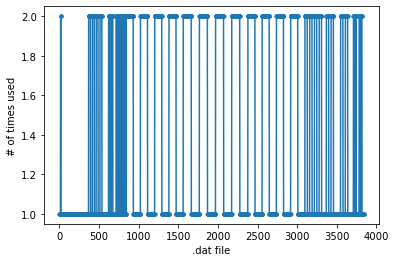

In [6]:
plt.plot(counts, '.-')
plt.ylabel('# of times used')
plt.xlabel('.dat file')
plt.show()

In [15]:
print(counts)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [18]:
print(len(np.where(np.array(counts)==2.)[0]))

1612


In [23]:
sss = np.loadtxt('/datax/scratch/benjb/C23_L_possible_duplicates.txt', dtype='str')[1:]

In [24]:
print(len(sss))

1649


In [7]:
xxx = dat_list[np.where(np.array(counts)==2.)[0]]
print(len(xxx))

1612


In [28]:
intersection = list(set(sss).intersection(xxx))

In [29]:
print(len(intersection))

1606


In [8]:
for x in xxx:
    print(x)

/home/obs/turboseti/AGBT18A_999_103/collate/spliced_blc0001020304050607_guppi_58306_40769_Bol520_0016.gpuspec.0000/spliced_blc0001020304050607_guppi_58306_40769_Bol520_0016.gpuspec.0000.dat
/home/obs/turboseti/AGBT18A_999_103/collate/spliced_blc0001020304050607_guppi_58306_41409_Bol520_off_0017.gpuspec.0000/spliced_blc0001020304050607_guppi_58306_41409_Bol520_off_0017.gpuspec.0000.dat
/home/obs/turboseti/AGBT18A_999_103/collate/spliced_blc0001020304050607_guppi_58306_42049_Bol520_0018.gpuspec.0000/spliced_blc0001020304050607_guppi_58306_42049_Bol520_0018.gpuspec.0000.dat
/home/obs/turboseti/AGBT18A_999_103/collate/spliced_blc0001020304050607_guppi_58306_42687_Bol520_off_0019.gpuspec.0000/spliced_blc0001020304050607_guppi_58306_42687_Bol520_off_0019.gpuspec.0000.dat
/home/obs/turboseti/AGBT19B_999_134/blc00_blp00/blc00_guppi_58873_04241_NGC6946_0034.rawspec.0000/blc00_guppi_58873_04241_NGC6946_0034.rawspec.0000.dat
/home/obs/turboseti/AGBT19B_999_134/blc00_blp00/blc00_guppi_58873_04556_

In [9]:
dfl.iloc[np.where(dfl['Target'].values == 'MESSIER101')[0]]

,Target,Session,Band,Cadence ID,Frequency,.h5 path,.dat path,Time
17382,MESSIER101,AGBT19B_999_134,L,48659,2251,/datag/pipeline/AGBT19B_999_134/blc00_blp00/bl...,/home/obs/turboseti/AGBT19B_999_134/blc00_blp0...,2020-01-25 09:48:33
17383,MESSIER101,AGBT19B_999_134,L,48659,2251,/datag/pipeline/AGBT19B_999_134/blc00_blp00/bl...,/home/obs/turboseti/AGBT19B_999_134/blc00_blp0...,2020-01-25 09:48:33
17384,MESSIER101,AGBT19B_999_134,L,48659,2251,/datag/pipeline/AGBT19B_999_134/blc00_blp00/bl...,/home/obs/turboseti/AGBT19B_999_134/blc00_blp0...,2020-01-25 09:48:33
17385,MESSIER101,AGBT19B_999_134,L,48659,2251,/datag/pipeline/AGBT19B_999_134/blc00_blp00/bl...,/home/obs/turboseti/AGBT19B_999_134/blc00_blp0...,2020-01-25 09:48:33
17386,MESSIER101,AGBT19B_999_134,L,48659,2251,/datag/pipeline/AGBT19B_999_134/blc00_blp00/bl...,/home/obs/turboseti/AGBT19B_999_134/blc00_blp0...,2020-01-25 09:48:33
...,...,...,...,...,...,...,...,...
17449,MESSIER101,AGBT19B_999_134,L,48659,938,/datag/pipeline/AGBT19B_999_134/blc07_blp07/bl...,/home/obs/turboseti/AGBT19B_999_134/blc07_blp0...,2020-01-25 09:48:33
17450,MESSIER101,AGBT19B_999_134,L,48659,938,/datag/pipeline/AGBT19B_999_134/blc07_blp07/bl...,/home/obs/turboseti/AGBT19B_999_134/blc07_blp0...,2020-01-25 09:48:33
17451,MESSIER101,AGBT19B_999_134,L,48659,938,/datag/pipeline/AGBT19B_999_134/blc07_blp07/bl...,/home/obs/turboseti/AGBT19B_999_134/blc07_blp0...,2020-01-25 09:48:33
17452,MESSIER101,AGBT19B_999_134,L,48659,938,/datag/pipeline/AGBT19B_999_134/blc07_blp07/bl...,/home/obs/turboseti/AGBT19B_999_134/blc07_blp0...,2020-01-25 09:48:33


In [40]:
for ii in range(len(dfl.iloc[np.where(dfl['Target'].values == 'MESSIER101')[0]])):
    print(dfl.iloc[np.where(dfl['Target'].values == 'MESSIER101')[0]]['Frequency'].values[ii])
    print(dfl.iloc[np.where(dfl['Target'].values == 'MESSIER101')[0]]['.h5 path'].values[ii])
    print(dfl.iloc[np.where(dfl['Target'].values == 'MESSIER101')[0]]['.dat path'].values[ii])

2251
/datag/pipeline/AGBT19B_999_134/blc00_blp00/blc00_guppi_58873_35313_MESSIER101_0124.rawspec.0000.h5
/home/obs/turboseti/AGBT19B_999_134/blc00_blp00/blc00_guppi_58873_35313_MESSIER101_0124.rawspec.0000/blc00_guppi_58873_35313_MESSIER101_0124.rawspec.0000.dat
2251
/datag/pipeline/AGBT19B_999_134/blc00_blp00/blc00_guppi_58873_35631_HIP68271_0125.rawspec.0000.h5
/home/obs/turboseti/AGBT19B_999_134/blc00_blp00/blc00_guppi_58873_35631_HIP68271_0125.rawspec.0000/blc00_guppi_58873_35631_HIP68271_0125.rawspec.0000.dat
2251
/datag/pipeline/AGBT19B_999_134/blc00_blp00/blc00_guppi_58873_35949_MESSIER101_0126.rawspec.0000.h5
/home/obs/turboseti/AGBT19B_999_134/blc00_blp00/blc00_guppi_58873_35949_MESSIER101_0126.rawspec.0000/blc00_guppi_58873_35949_MESSIER101_0126.rawspec.0000.dat
2251
/datag/pipeline/AGBT19B_999_134/blc00_blp00/blc00_guppi_58873_36271_HIP69435_0127.rawspec.0000.h5
/home/obs/turboseti/AGBT19B_999_134/blc00_blp00/blc00_guppi_58873_36271_HIP69435_0127.rawspec.0000/blc00_guppi_588